<a href="https://colab.research.google.com/github/abhishekCS0024/Types-of-RAG/blob/main/Corrective_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain langchain_core langchain_groq langchain_community langchain langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.1/500.1 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.1/158.1 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.9/70.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.

In [9]:
from langchain_groq import ChatGroq
from google.colab import userdata

In [10]:
llm=ChatGroq(
    temperature=0,
    groq_api_key=userdata.get('Groq'),
    model_name="qwen/qwen3-32b",
    verbose=True
)

In [4]:
llm.invoke('hi')

AIMessage(content='<think>\nOkay, the user said "hi". That\'s a greeting. I should respond in a friendly and welcoming way. Maybe ask how I can assist them. Keep it open-ended so they can specify what they need help with. Let me make sure the tone is positive and approachable.\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 73, 'prompt_tokens': 9, 'total_tokens': 82, 'completion_time': 0.155221759, 'completion_tokens_details': None, 'prompt_time': 0.000245074, 'prompt_tokens_details': None, 'queue_time': 0.063605856, 'total_time': 0.155466833}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_78ac7f3229', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c532a-23f1-7ca2-8d8d-0e3bcac75466-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 9, 'output_tokens': 73, 'total_tokens': 82})

In [5]:
! pip install langchain langchain-community langchain-huggingface chromadb beautifulsoup4 tiktoken sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 2.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of transformers to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.4/21.4 MB 132.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.4/566.4 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 124.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 

In [ ]:
# Install a compatible version of transformers
!pip install transformers==4.29.2

In [1]:
# from langchain_community.text_splitters import RecursiveCharacterTextSplitter

from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_huggingface import HuggingFaceEmbeddings

EMBEDDING_MODEL = "sentence-transformers/all-MiniLM-L6-v2" # Defining EMBEDDING_MODEL

embeddings = HuggingFaceEmbeddings(
    model_name=EMBEDDING_MODEL
)

urls = [
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
    "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/",
]

docs = [WebBaseLoader(url).load() for url in urls]
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=250, chunk_overlap=50
)
doc_splits = text_splitter.split_documents(docs_list)

# Add to vectorDB
vectorstore = Chroma.from_documents(
    documents=doc_splits,
    collection_name="rag-chroma",
    embedding=embeddings,
)
retriever = vectorstore.as_retriever()



/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.9/314.9 kB 19.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 108.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
Failed to build tokenizers
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (tokenizers)


In [3]:
question = "tell me about the agent memory."

# Use the retriever to get relevant documents for the question
retrieved_docs = retriever.invoke(question)

# Take the page_content from the first retrieved document
doc_txt = retrieved_docs[0].page_content

print(retrieval_grader.invoke({"question": question, "document": doc_txt}))

NameError: name 'retrieval_grader' is not defined

In [4]:
! pip install langchain-classic

In [5]:
# New import path
from langchain_classic import hub

# Pull a prompt
prompt = hub.pull("hwchase17/react")

In [11]:
# from langchain import hub
from langchain_core.output_parsers import StrOutputParser

# Prompt
prompt = hub.pull("rlm/rag-prompt")

print(f"---PROMPT--- {prompt}")

# Post-processing
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


# Chain
rag_chain = prompt | llm | StrOutputParser()

---PROMPT--- input_variables=['context', 'question'] input_types={} partial_variables={} metadata={'lc_hub_owner': 'rlm', 'lc_hub_repo': 'rag-prompt', 'lc_hub_commit_hash': '50442af133e61576e74536c6556cefe1fac147cad032f4377b60c436e6cdcb6e'} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"), additional_kwargs={})]


In [12]:
# Run
question = "tell me about agent memory."
# Retrieve relevant documents, format them, and then invoke the RAG chain
generation = rag_chain.invoke({"context": format_docs(retriever.invoke(question)), "question": question})
print(generation)

<think>
Okay, the user is asking about agent memory. Let me look at the provided context.

First, the context mentions a memory stream as a long-term memory module using an external database. It records agents' experiences in natural language, with each element being an observation or event. Then there's a retrieval model that uses relevance, recency, and importance to inform the agent's behavior. The reflection mechanism synthesizes memories into higher-level inferences. Also, there's short-term memory related to in-context learning and long-term memory using external storage. 

I need to summarize this concisely. Start by explaining the memory stream and its role. Mention the retrieval model's criteria. Then touch on reflection and the distinction between short-term and long-term memory. Keep it under three sentences. Make sure to highlight key components without getting too detailed. Check if all important parts are covered: memory types, retrieval factors, reflection, and storage m

In [13]:
from langgraph.graph import END, StateGraph, START

In [14]:
from typing import List

from typing_extensions import TypedDict

class State(TypedDict):
    """
    Represents the state of our graph.

    Attributes:
        question: question
        generation: LLM generation
        web_search: whether to add search
        documents: list of documents
    """

    question: str
    generation: str
    web_search: str
    documents: List[str]

workflow= StateGraph(State)

# Types of Node :-

- retrieve
- grade_documents
- generate
- transform query
- web search

In [15]:
def retrieve(state):
  ''' Retrieve documents from the vector store  '''

  question=state['question']

  documents= docs = retriever.invoke(question)

  return {"documents": documents, "question": question}

In [16]:
from langchain_core.prompts import ChatPromptTemplate
from pydantic import BaseModel, Field


class GradeDocuments(BaseModel):
    """Binary score for relevance check on retrieved documents."""

    binary_score: str = Field(
        description="Documents are relevant to the question, 'yes' or 'no'"
    )

# LLM with function call
structured_llm_grader = llm.with_structured_output(GradeDocuments)
# Prompt
system = """You are a grader assessing relevance of a retrieved document to a user question. \n
    If the document contains keyword(s) or semantic meaning related to the question, grade it as relevant. \n
    Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question."""
grade_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "Retrieved document: \n\n {document} \n\n User question: {question}"),
    ]
)

retrieval_grader = grade_prompt | structured_llm_grader


In [17]:
def grade_documents(state):
  '''
  determine wheather the document is relevent or not with the query asked by the user
    '''

  question=state['question']
  documents=state['documents']

  # Score each doc
  filtered_docs = []

  web_search = "No"



  for d in documents:
      score = retrieval_grader.invoke(
            {"question": question, "document": d.page_content}
        )
      grade = score.binary_score
      if grade == "yes":
            print("---GRADE: DOCUMENT RELEVANT---")
            filtered_docs.append(d)
      else:
            print("---GRADE: DOCUMENT NOT RELEVANT---")
            web_search = "Yes"
            continue
  return {"documents": filtered_docs, "question": question, "web_search": web_search}

In [18]:
def generate(state):
    """
    Generate answer

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, generation, that contains LLM generation
    """

    print("---GENERATE---")

    question = state["question"]
    documents = state["documents"]

    generation = rag_chain.invoke({"context": documents, "question": question})

    return {"documents": documents, "question": question, "generation": generation}

In [19]:
def transform_query(state):
    """
    Transform the query to produce a better question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates question key with a re-phrased question
    """
    print("---TRANSFORM QUERY---")

    question = state["question"]

    documents = state["documents"]

    # Re-write question
    better_question = question_rewriter.invoke({"question": question})

    return {"documents": documents, "question": better_question}

In [20]:
### Search

from langchain_community.tools.tavily_search import TavilySearchResults
from google.colab import userdata

web_search_tool = TavilySearchResults(k=3, tavily_api_key=userdata.get('TAVILY_API_KEY'))

/tmp/ipython-input-1367322894.py:6: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  web_search_tool = TavilySearchResults(k=3, tavily_api_key=userdata.get('TAVILY_API_KEY'))


In [21]:

from langchain_core.documents import Document
def web_search(state):
    """
    Web search based on the re-phrased question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with appended web results
    """
    print("---WEB SEARCH---")

    question = state["question"]

    documents = state["documents"]

    # Web search
    docs = web_search_tool.invoke({"query": question})

    web_results = "\n".join([d["content"] for d in docs])

    web_results = Document(page_content=web_results)

    documents.append(web_results)

    return {"documents": documents, "question": question}

In [22]:

def decide_to_generate(state):

    if web_search == "Yes":
        return "transform_query"
    else:
        return "generate"

In [23]:
from langgraph.graph import END, StateGraph, START

In [24]:
workflow.add_node("retrieve", retrieve)  # retrieve
workflow.add_node("grade_documents", grade_documents)  # grade documents
workflow.add_node("generate", generate)  # generatae
workflow.add_node("transform_query", transform_query)  # transform_query
workflow.add_node("web_search_node", web_search)  # web search

In [25]:

# Build graph
workflow.add_edge(START, "retrieve")

workflow.add_edge("retrieve", "grade_documents")

workflow.add_conditional_edges("grade_documents", decide_to_generate, {"transform_query": "transform_query","generate": "generate",}),

workflow.add_edge("transform_query", "web_search_node")

workflow.add_edge("web_search_node", "generate")

workflow.add_edge("generate", END)

In [26]:
# Compile
app = workflow.compile()

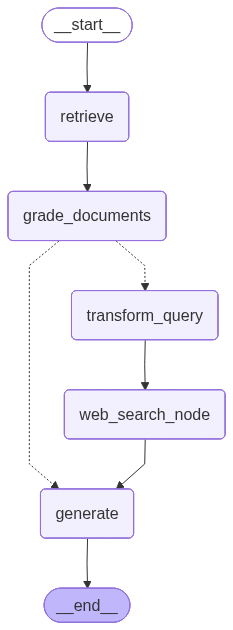

In [27]:
app

In [28]:
from pprint import pprint

In [29]:
# Run
inputs = {"question": "tell me about the agent memory."}

for output in app.stream(inputs):
    for key, value in output.items():
        # Node
        pprint(f"Node '{key}':")
        # Optional: print full state at each node
        # pprint.pprint(value["keys"], indent=2, width=80, depth=None)
    pprint("\n---\n")
# Final generation
pprint(value["generation"])

"Node 'retrieve':"
'\n---\n'
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
"Node 'grade_documents':"
'\n---\n'
---GENERATE---
"Node 'generate':"
'\n---\n'
('<think>\n'
 'Okay, the user is asking about agent memory in the context of LLM-powered '
 'autonomous agents. Let me look through the provided documents to find '
 'relevant information.\n'
 '\n'
 'First, the documents mention that memory in these agents is divided into '
 'short-term and long-term. Short-term memory is related to in-context '
 'learning, which is part of prompt engineering. That makes sense because the '
 'model uses the current context to learn temporarily.\n'
 '\n'
 'Long-term memory is explained as using an external vector store for '
 'retaining information over extended periods. This allows the agent to recall '
 'past experiences, which is crucial for complex tasks. The documents also '
 'talk about a memory stream that records exp

In [30]:
# Run
inputs = {"question": "tell me about the taj mahal."}

for output in app.stream(inputs):
    for key, value in output.items():
        # Node
        pprint(f"Node '{key}':")
        # Optional: print full state at each node
        # pprint.pprint(value["keys"], indent=2, width=80, depth=None)
    pprint("\n---\n")
# Final generation
pprint(value["generation"])

"Node 'retrieve':"
'\n---\n'
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
"Node 'grade_documents':"
'\n---\n'
---GENERATE---
"Node 'generate':"
'\n---\n'
('<think>\n'
 'Okay, the user is asking about the Taj Mahal. Let me check the context '
 "provided. Oh, the context is empty, so there's no information to use. I need "
 "to let them know I can't answer without the context. I should mention that "
 'the Taj Mahal is a famous monument in India, built by Shah Jahan as a '
 'mausoleum for Mumtaz Mahal. But since the context is empty, I have to say I '
 "don't know. Wait, but maybe I can still give a general answer? The user "
 'might not know the context is empty. Hmm, the instructions say to use the '
 "retrieved context. Since there's none, I should stick to the rules and say I "
 "don't know. But maybe the user expects a basic answer. I'm a bit confused. "
 "Let me re-read the instructions. 